- [GaussianNB 高斯](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
- [MultinomialNB 多项式](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.naive_bayes import GaussianNB, MultinomialNB # 高斯和多项式朴素贝叶斯
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
features = [2,3]

In [4]:
## 读取数据
path = './datas/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x = data[list(range(4))]
x = x[features]
y = pd.Categorical(data[4]).codes ## 直接将数据特征转换为0，1,2
print ("总样本数目：%d；特征属性数目：%d" % x.shape)
print(y)

总样本数目：150；特征属性数目：2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
## 0. 数据分割，形成模型训练数据和测试数据
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：120, 测试数据集样本数目：30


In [6]:
## 高斯贝叶斯模型构建
clf = Pipeline([
        ('sc', StandardScaler()), # 标准化，转换为高斯分布，这里用归一化效果不好
        ('poly', PolynomialFeatures(degree=1)),
        ('clf', GaussianNB())])
## 训练模型
clf.fit(x_train, y_train)

Pipeline(steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('clf', GaussianNB(priors=None))])

In [7]:
## 计算预测值并计算准确率
y_train_hat = clf.predict(x_train)
print ('训练集准确度: %.2f%%' % (100 * accuracy_score(y_train, y_train_hat)))
y_test_hat = clf.predict(x_test)
print ('测试集准确度：%.2f%%' % (100 * accuracy_score(y_test, y_test_hat)))


训练集准确度: 95.83%
测试集准确度：96.67%


In [8]:
## 产生区域图
N, M = 500, 500     # 横纵各采样多少个值
x1_min1, x2_min1 = x_train.min()
x1_max1, x2_max1 = x_train.max()
x1_min2, x2_min2 = x_test.min()
x1_max2, x2_max2 = x_test.max()
x1_min = np.min((x1_min1, x1_min2))
x1_max = np.max((x1_max1, x1_max2))
x2_min = np.min((x2_min1, x2_min2))
x2_max = np.max((x2_max1, x2_max2))

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = clf.predict(x_show)                  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)

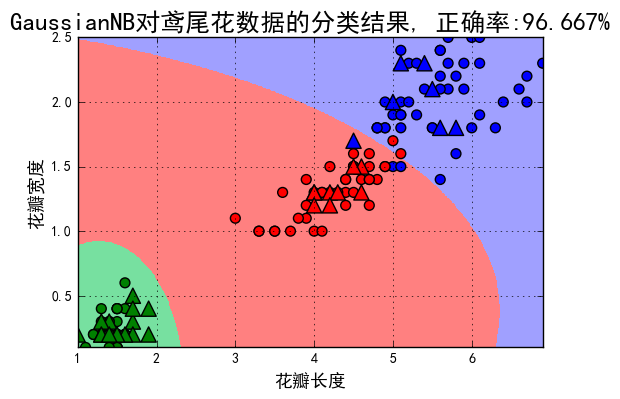

In [9]:
## 画图
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x_train[features[0]], x_train[features[1]], c=y_train, edgecolors='k', s=50, cmap=cm_dark)
plt.scatter(x_test[features[0]], x_test[features[1]], c=y_test, marker='^', edgecolors='k', s=120, cmap=cm_dark)
plt.xlabel(iris_feature_C[features[0]], fontsize=13)
plt.ylabel(iris_feature_C[features[1]], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'GaussianNB对鸢尾花数据的分类结果, 正确率:%.3f%%' % (100 * accuracy_score(y_test, y_test_hat)), fontsize=18)
plt.grid(True)
plt.show()